https://learn.microsoft.com/en-us/azure/storage/blobs/storage-quickstart-blobs-python?tabs=managed-identity%2Croles-azure-portal%2Csign-in-azure-cli&pivots=blob-storage-quickstart-scratch

Azure Blob Storage is optimized for storing massive amounts of unstructured data. Unstructured data is data that doesn't adhere to a particular data model or definition, such as text or binary data. Blob storage offers three types of resources:

- The storage account

  - A container in the storage account

    - A blob in the container

**Step-1**

**install the packages**

In [1]:
!pip install azure-storage-blob azure-identity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.9/404.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.8/111.8 kB 7.3 MB/s eta 0:00:00


Use the following Python classes to interact with these resources:

**BlobServiceClient:** The BlobServiceClient class allows you to manipulate Azure Storage resources and blob containers.

**ContainerClient:** The ContainerClient class allows you to manipulate Azure Storage containers and their blobs.

**BlobClient:** The BlobClient class allows you to manipulate Azure Storage blobs.

## Create Container

Create a new container in your storage account by calling the create_container method on the blob_service_client object

- we need to access azure account

- we need to access the corresponding sotrage details

- BlobServiceClient Expecting two arguments

  - account_url

  - credential

In [ ]:
 ########################### Account url ########################################################
 #account_url: This is the URL of the Azure Storage account that you want to interact with.

 # It typically looks like

 # https://<your-storage-account-name>.blob.core.windows.net/.

 # This URL provides the endpoint to access the blob storage service.

# please login to portal.azure.com

# on which storage account you need to work go to the your storage account name

# Under the essential right top json view will be avialable

#blob_account_url= "https://azuresessionnareshit.blob.core.windows.net/"
 ########################################################################################################


In [ ]:
############################## Credentials#######################################################

# please login to portal.azure.com

# Under the Security + networking we have access keys

# We habe two keys available

# You can choose any key

#storage_credential="bJKe8VEvkOHfAAEit3f+2s3VRnx7VKX54399o3y5/nGKIoVXhAcTl79R0pS+bpvDdnMhXNhhTEIi+AStY84Whg=="

In [2]:
from azure.storage.blob import BlobServiceClient

In [3]:
blob_account_url='https://azuresessionnareshit.blob.core.windows.net/'
storage_credential="bJKe8VEvkOHfAAEit3f+2s3VRnx7VKX54399o3y5/nGKIoVXhAcTl79R0pS+bpvDdnMhXNhhTEIi+AStY84Whg=="

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)

blob_service_client

**Method-1**

- we will create the container using blob service client

In [4]:
# Create the container
new_container=blob_service_client.create_container('nareshitomkarcontainer',public_access='Container')
new_container

**Method-2**

- we can create the container using get contianer client

- IN this way we can give access level

In [5]:
# Create a ContainerClient instance for the specified container
container_name='nareshitomkar1'
container_client = blob_service_client.get_container_client(container_name)

# Create the container with public access
container_client.create_container(public_access="container")

{'etag': '"0x8DCC3A03840953B"',
 'last_modified': datetime.datetime(2024, 8, 23, 18, 20, 8, tzinfo=datetime.timezone.utc),
 'client_request_id': '53fc85ec-617c-11ef-8026-0242ac1c000c',
 'request_id': 'fccb2e64-b01e-00e4-3489-f5c423000000',
 'version': '2024-08-04',
 'date': datetime.datetime(2024, 8, 23, 18, 20, 7, tzinfo=datetime.timezone.utc)}

In [6]:
new_container.get_container_properties()

{'name': 'nareshitomkarcontainer', 'last_modified': datetime.datetime(2024, 8, 23, 18, 17, 28, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC39FD88CFDCF"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': None, 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': {}, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fabf9ff9a80>, 'immutable_storage_with_versioning_enabled': False}

## List out All containers

In [8]:
all_containers=blob_service_client.list_containers()
all_containers

<iterator object azure.core.paging.ItemPaged at 0x7fabf9ffa620>

In [9]:
# the variable is a iterator, you need to get outputs by using for loop
for container in all_containers:
    print(container)

{'name': 'nareshitcontainer', 'last_modified': datetime.datetime(2024, 8, 23, 17, 6, 43, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC395F6A46489"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fac16e49a50>, 'immutable_storage_with_versioning_enabled': False}
{'name': 'nareshitomkar1', 'last_modified': datetime.datetime(2024, 8, 23, 18, 20, 8, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC3A03840953B"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fabf9ff9c90>, 'immutable_storage_wi

In [11]:
all_containers=blob_service_client.list_containers()
list(all_containers)

[{'name': 'nareshitcontainer', 'last_modified': datetime.datetime(2024, 8, 23, 17, 6, 43, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC395F6A46489"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fabf9ffb3a0>, 'immutable_storage_with_versioning_enabled': False},
 {'name': 'nareshitomkar1', 'last_modified': datetime.datetime(2024, 8, 23, 18, 20, 8, tzinfo=datetime.timezone.utc), 'etag': '"0x8DCC3A03840953B"', 'lease': {'status': 'unlocked', 'state': 'available', 'duration': None}, 'public_access': 'container', 'has_immutability_policy': False, 'deleted': None, 'version': None, 'has_legal_hold': False, 'metadata': None, 'encryption_scope': <azure.storage.blob._models.ContainerEncryptionScope object at 0x7fabf9ff8c10>, 'immutable_storage

## Delete the Container

In [24]:
all_containers=blob_service_client.list_containers()
for container in all_containers:
    print("deleting:",container['name'])
    blob_service_client.delete_container(container['name'])

deleting: nareshitomkarcontainer


- In above we cretaed a Container

- we list out all containers

- we deleted containers

## Upload a blob

- we deleted all containers

- So create one container

- upload a blob in that container

- access the blob from container

**Create the container**

In [13]:
blob_account_url='https://azuresessionnareshit.blob.core.windows.net/'
storage_credential="bJKe8VEvkOHfAAEit3f+2s3VRnx7VKX54399o3y5/nGKIoVXhAcTl79R0pS+bpvDdnMhXNhhTEIi+AStY84Whg=="

blob_service_client=BlobServiceClient(account_url=blob_account_url,
                                      credential=storage_credential)
new_container=blob_service_client.create_container('nareshitomkarcontainer',public_access='Container')
new_container

$text-file$

In [15]:
# Create a BlobClient instance for the specified blob
blob_name='mbox-short.txt'
file_path='/content/mbox-short.txt'
container_client = blob_service_client.get_container_client('nareshitomkarcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

$csv-file$

In [16]:
blob_name='Visadataset.csv'
file_path='/content/Visadataset.csv'
container_client = blob_service_client.get_container_client('nareshitomkarcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

$image$

In [17]:
blob_name='download.png'
file_path='/content/download.png'
container_client = blob_service_client.get_container_client('nareshitomkarcontainer')
blob_client = container_client.get_blob_client(blob_name)

# Upload the file to the blob
with open(file_path, "rb") as data:
    blob_client.upload_blob(data, overwrite=True)

## Access the blobs

**Get all the blobs**

In [18]:
container_client = blob_service_client.get_container_client('nareshitomkarcontainer')
for blob in container_client.list_blobs():
    print(blob)

{'name': 'Visadataset.csv', 'container': 'nareshitomkarcontainer', 'snapshot': None, 'version_id': None, 'is_current_version': None, 'blob_type': <BlobType.BLOCKBLOB: 'BlockBlob'>, 'metadata': {}, 'encrypted_metadata': None, 'last_modified': datetime.datetime(2024, 8, 23, 18, 51, 52, tzinfo=datetime.timezone.utc), 'etag': '0x8DCC3A4A720816D', 'size': 1855358, 'content_range': None, 'append_blob_committed_block_count': None, 'is_append_blob_sealed': None, 'page_blob_sequence_number': None, 'server_encrypted': True, 'copy': {'id': None, 'source': None, 'status': None, 'progress': None, 'completion_time': None, 'status_description': None, 'incremental_copy': None, 'destination_snapshot': None}, 'content_settings': {'content_type': 'application/octet-stream', 'content_encoding': None, 'content_language': None, 'content_md5': bytearray(b'[RI\xd5\x8fkq\x83\xa0R9W[H\x8f\xf4'), 'content_disposition': None, 'cache_control': None}, 'lease': {'status': 'unlocked', 'state': 'available', 'duration'

**Access CSV data**

In [20]:
blob_client=blob_service_client.get_blob_client('nareshitomkarcontainer','Visadataset.csv')
data=blob_client.download_blob()
import pandas as pd
pd.read_csv(data)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Access Image data**

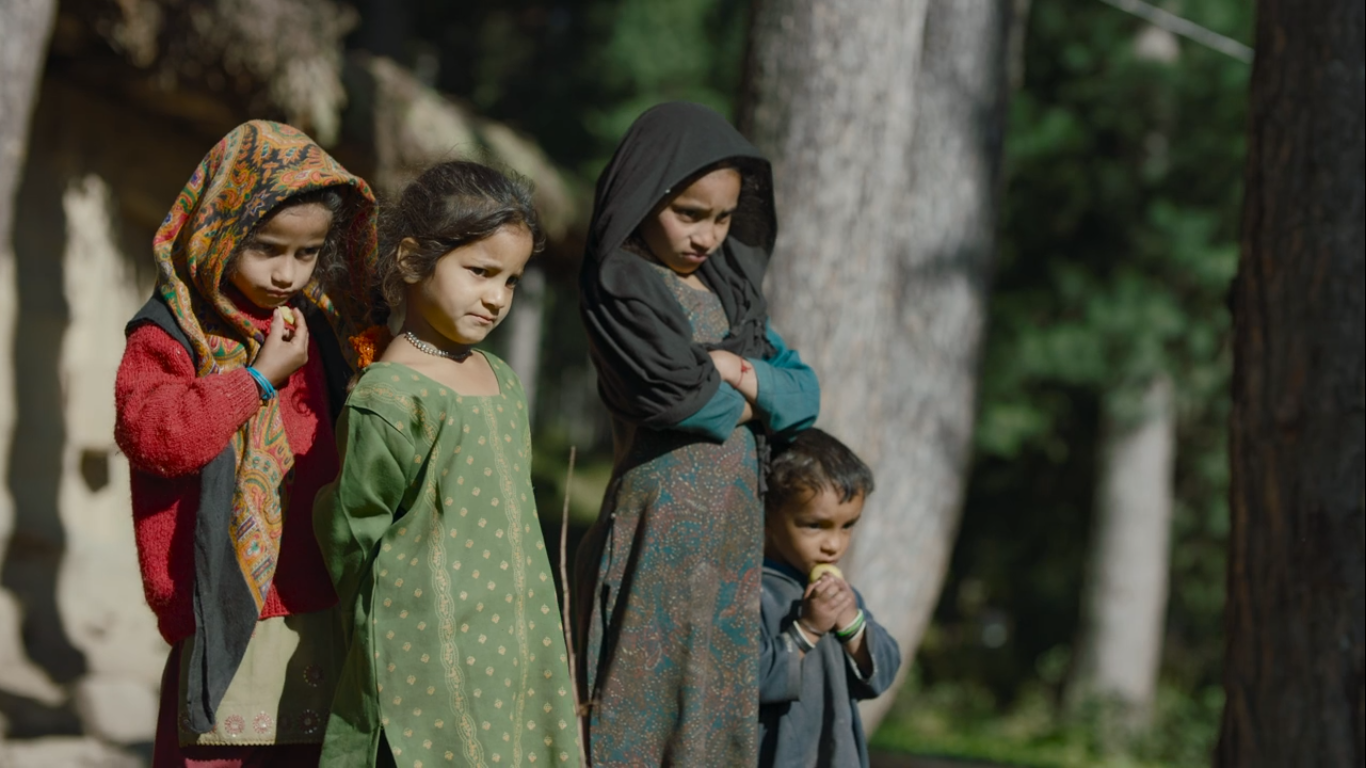

In [23]:
blob_client=blob_service_client.get_blob_client('nareshitomkarcontainer','download.png')
data=blob_client.download_blob()
from PIL import Image
Image.open(data)